<a href="https://colab.research.google.com/github/Olamide-Faroun/Telco-Customer-Churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TELCO CUSTOMER CHURN MODEL**

Data source: https://www.kaggle.com/datasets/blastchar/telco-customer-churn

# **OBJECTIVES AND GOAL OF THE STUDY**

**GOAL:** To investigate factors that led customers to leave Telco.

**OBJECTIVES OF THE STUDY:**
1. What are the main factors influencing churn in the company?
2. Can we predict which customers are likely to churn based on certain features?
3. Are there specific patterns or trends in customer behaviour before they churn?

**OBJECTIVES OF THE NOTEBOOK:**

1.   Perform descriptive analysis on the dataset
2.   Data Preprocessing - feature engineering
3.   Model creation and evaluation



In [1]:
!pip install opendatasets -q

In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
od.download("https://www.kaggle.com/datasets/blastchar/telco-customer-churn/code")
df=pd.read_csv("/content/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: olamidefaroun
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


100%|██████████| 172k/172k [00:00<00:00, 169MB/s]

# **DESCRIPTIVE ANALYSIS**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.duplicated().value_counts()

,count
False,7043


There are no duplicates nor missing values, and we know the data types we are dealing with. We will now further explore the dataset to give more clarity

In [10]:
# Convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill NaNs the safe way
df['TotalCharges'] = df['TotalCharges'].fillna(0)

# Double-check MonthlyCharges and tenure
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

While exploring our dataset, we observed that the TotalCharges column was stored as an object type, which is unexpected since it should be numeric. This indicates there's likely some non-numeric values in the column. Having done the above, we can now further explore the dataset with accurate numerical analysis.

In [11]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


From the analysis above, it is observed that the maximum tenure the company retains a customer is 72 months which equates to 6years and minimum is 0

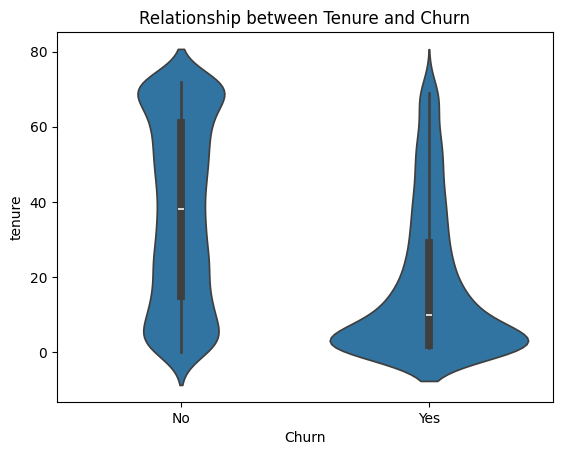

In [12]:
sns.violinplot(x=df['Churn'], y=df['tenure'])
plt.title("Relationship between Tenure and Churn")
plt.show()

A violin plot was used to show the relationship between Tenure and Churn in order to provide insights to both distribution and density. On average, customers who remained with the company had a tenure of around 40 months, while those who churned typically left after about 10 months. The plot also highlights a higher concentration of churn among customers with shorter tenures.

In [13]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df = df.drop(['customerID'], axis=1)
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


We dropped 'customerID' as it is just an identifier. We now have 20 columns and 7043 rows to work with.

In [14]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


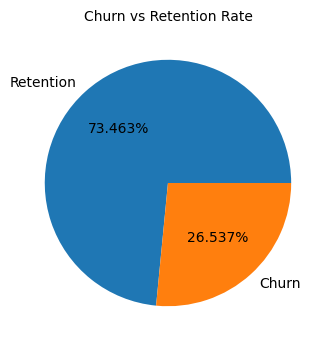

In [15]:
plt.figure(figsize=(4, 4))
counts = df['Churn'].value_counts()
labels = ['Retention', 'Churn']
plt.pie(counts, labels=labels, autopct= '%1.3f%%')
plt.title('Churn vs Retention Rate', fontsize = 10)
plt.show()

From the information above, we have an imbalanced dataset which will be dealt with later

Churn rate by cluster:
Churn           0         1
Cluster                    
0        0.957689  0.042311
1        0.856734  0.143266
2        0.583187  0.416813
3        0.627263  0.372737


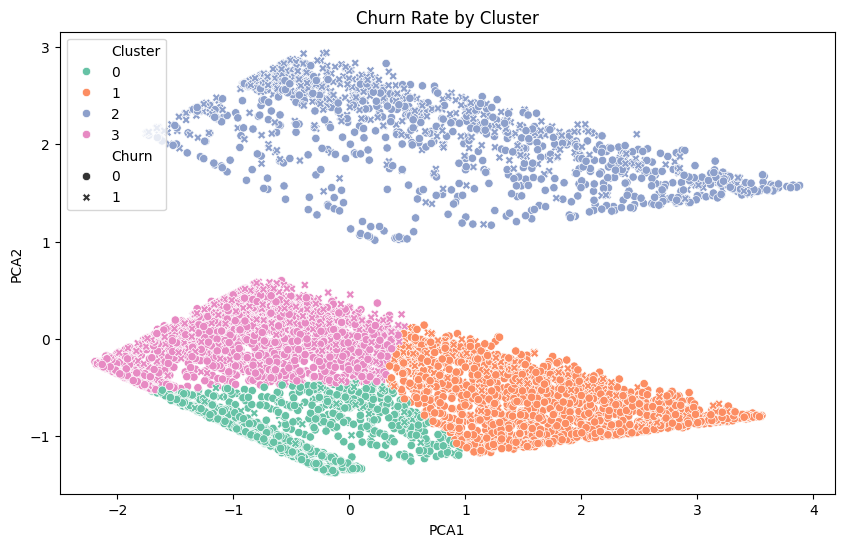

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df_cluster = df.copy()

numerical_features = df_cluster.select_dtypes(include=['int64', 'float64']).drop(columns=['Churn'], errors='ignore')

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_features)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_cluster['Cluster'] = clusters

churn_by_cluster = df_cluster.groupby('Cluster')['Churn'].value_counts(normalize=True).unstack()
print("Churn rate by cluster:")
print(churn_by_cluster)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_cluster['PCA1'], df_cluster['PCA2'] = X_pca[:, 0], X_pca[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='Cluster', style='Churn', palette='Set2')
plt.title("Churn Rate by Cluster")
plt.show()


From the above scatterplot is observed that Cluster 2 & 3 have higher churn rates (37% - 41%), suggesting that these groups have a higher risk of leaving. Principal Component Analysis was used to reduce dimensionality which improves visualisation and ionterpretability.

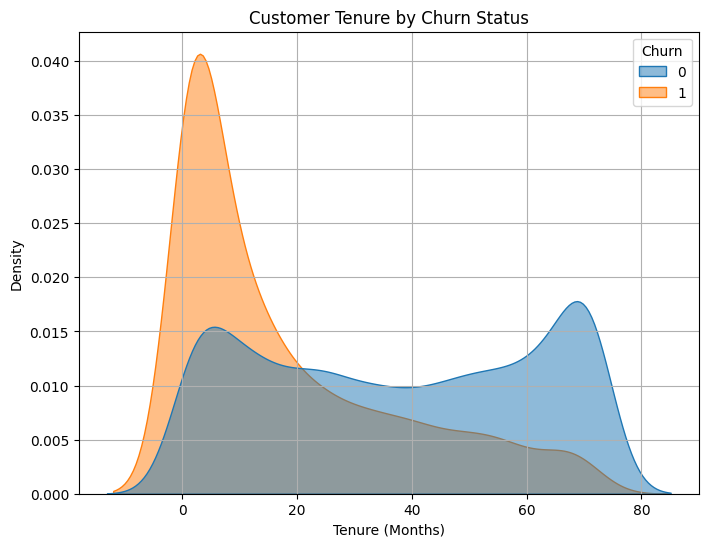

In [17]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('Customer Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Customers who churn tend to have shorter tenures

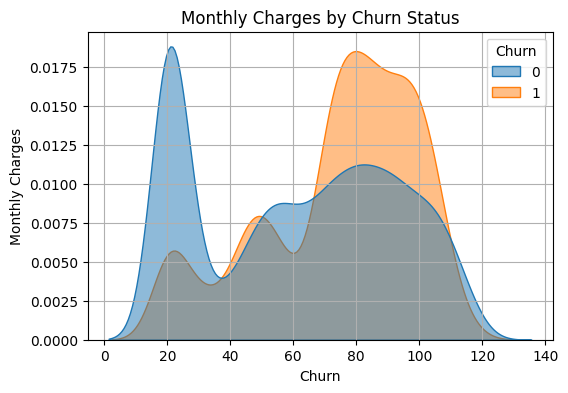

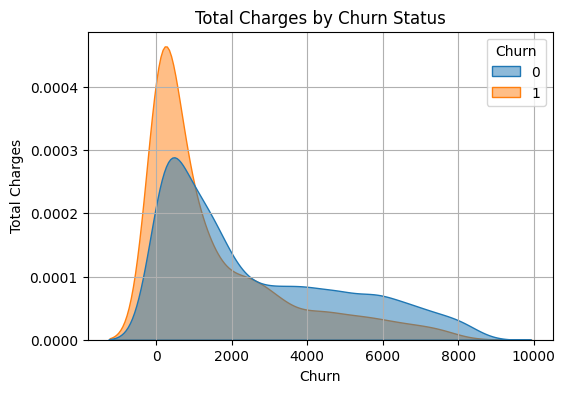

In [18]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.grid(True)
plt.show()


plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True, common_norm=False, alpha=0.5)
plt.title('Total Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.grid(True)
plt.show()

Customers who pay more monthly tend to churn but lower total charges which could be because churn happens early.

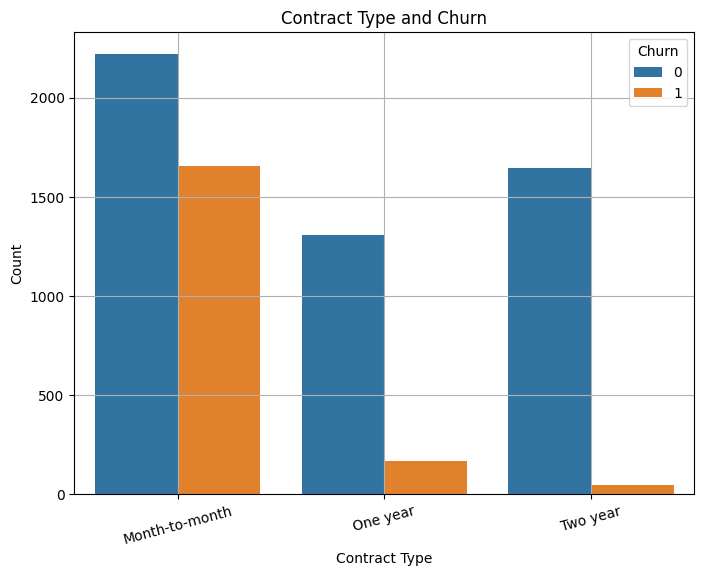

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract Type and Churn')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.grid(True)
plt.show()


Customers with long term contracts (1-2 years) have low churn rate.

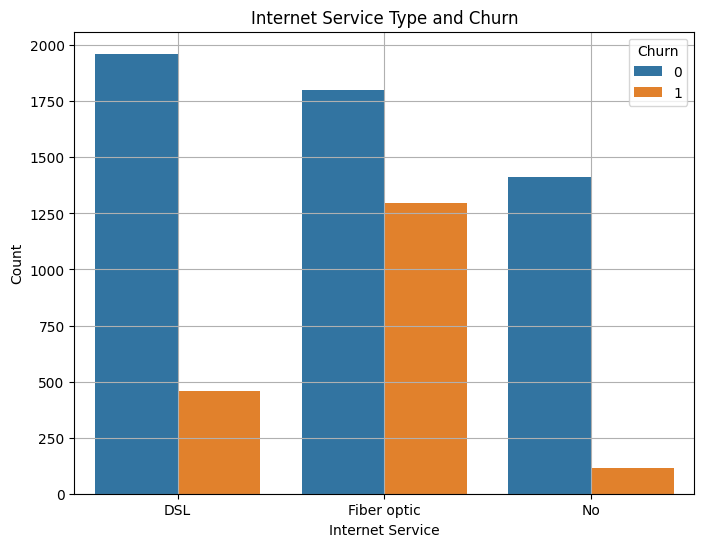

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Internet Service Type and Churn')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.grid(True)
plt.show()

Customers with Fiber optic internet service tend to have a higher churn rate.

# **DATA PREPROCESSING**

**SPLITTING THE DATASET**

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis='columns')
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [22]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4930, 19), (4930,), (2113, 19), (2113,))

# **Feature Engineering**

**ENCODING, SCALING AND BALANCING THE DATASET** - A Pipeline was used for these processes to prevent data leakage and improve the overall efficiency

In [23]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

In [24]:
def create_pipeline(method):
    categorical_vars = X.select_dtypes(include=['object']).columns.tolist()
    numerical_vars = X.select_dtypes(include=['int64', 'float64']).columns


    categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    numerical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ])


    preprocessor = ColumnTransformer(
        transformers=[

            ('cat', categorical_transformer, categorical_vars),
            ('num', numerical_transformer, numerical_vars)
        ])

    if method == 'pca':
        reducer = PCA(n_components=5)
    elif method == 'lda':
        reducer = LDA(n_components=1)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTEENN()),
        ('reducer', reducer),
        ('classifier',RandomForestClassifier(n_estimators=100, random_state=42))
        ])

    return pipeline

In [25]:
method = 'lda'
pipeline = create_pipeline(method)

from sklearn import set_config
set_config(display='diagram')

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('smote', SMOTEENN()),
                ('reducer', LinearDiscriminantAnalysis(n_components=1)),
                ('classifier', RandomForestClassifier(random_state=42))])

# **MODEL CREATION**

In [26]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score, accuracy_score, roc_auc_score, roc_curve

In [27]:
def metrics(truelabels, predictedlabel):
  print ("Accuracy: {:.3f}".format(accuracy_score(truelabels, predictedlabel)))
  print ("Precision: {:.3f}".format(precision_score(truelabels, predictedlabel)))
  print ("Recall: {:.3f}".format(recall_score(truelabels, predictedlabel)))
  print ("F1-score: {:.3f}".format(f1_score(truelabels, predictedlabel)))
  print ("ROC_AUC Score: {:.3f}".format(roc_auc_score(truelabels, predictedlabel)))
  print ("\nClassification Report:")
  print (classification_report(truelabels, predictedlabel))

In [30]:
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score, accuracy_score
from sklearn.preprocessing import FunctionTransformer


models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(max_depth=11, min_samples_split=2, criterion='gini'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3, weights='uniform', algorithm='auto'),
    "RandomForest": RandomForestClassifier(n_estimators=40, max_depth=5, random_state=15, class_weight='balanced')
}

for model_name, model in models.items():
    print(f"\n=== Evaluation of {model_name} after Pipeline Steps ===")

    pipeline = ImbPipeline(steps=[
        ('preprocessor', create_pipeline(method).named_steps['preprocessor']),
        ('smote', SMOTEENN()),
        ('reducer', create_pipeline(method).named_steps['reducer']),
        ('classifier', model)
    ])

    try:
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)
        metrics(y_test, y_pred)
    except Exception as e:
        print(f"❌ Skipping {model_name} due to error: {e}")


=== Evaluation of Logistic Regression after Pipeline Steps ===
Accuracy: 0.703
Precision: 0.475
Recall: 0.876
F1-score: 0.616
ROC_AUC Score: 0.757

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1539
           1       0.47      0.88      0.62       574

    accuracy                           0.70      2113
   macro avg       0.70      0.76      0.69      2113
weighted avg       0.81      0.70      0.72      2113


=== Evaluation of Decision Tree Classifier after Pipeline Steps ===
Accuracy: 0.692
Precision: 0.463
Recall: 0.843
F1-score: 0.598
ROC_AUC Score: 0.739

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.64      0.75      1539
           1       0.46      0.84      0.60       574

    accuracy                           0.69      2113
   macro avg       0.69      0.74      0.67      2113
weighted avg       0.79      0.69      0.71      211

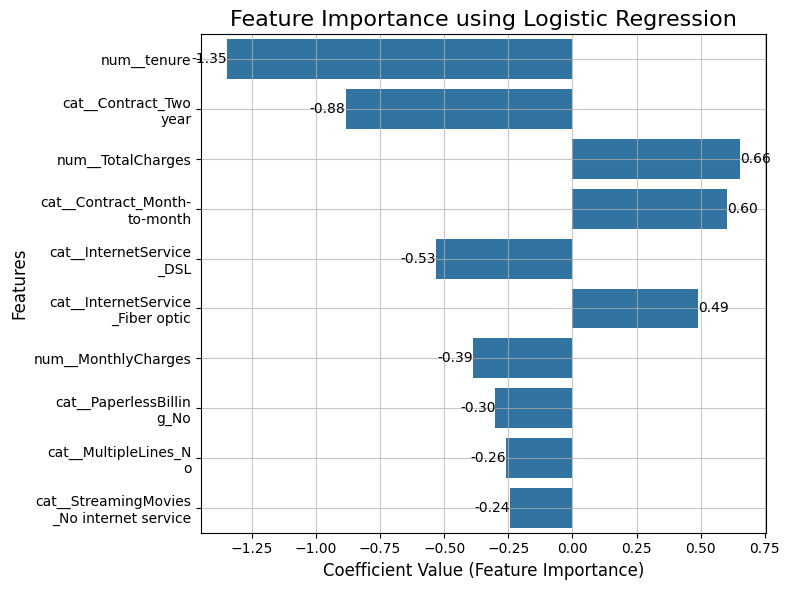

In [31]:
import textwrap

model_name = "Logistic Regression"
model = LogisticRegression(max_iter=1000)

pipeline = Pipeline(steps=[
    ('preprocessor', create_pipeline('lda').named_steps['preprocessor']),
    ('classifier', model)
])

pipeline.fit(X_train, y_train)

feature_importance = pipeline.named_steps['classifier'].coef_[0]
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

sorted_idx = np.argsort(np.abs(feature_importance))[::-1]
sorted_feature_importance = feature_importance[sorted_idx]
sorted_feature_names = feature_names[sorted_idx]

N =10
top_importance = sorted_feature_importance[:N]
top_features = [textwrap.fill(f, width=20) for f in sorted_feature_names[:N]]

plt.figure(figsize=(8, 6))
sns.barplot(x=top_importance, y=top_features)

for i, v in enumerate(top_importance):
    plt.text(v, i, f'{v:.2f}', va='center', ha='left' if v > 0 else 'right', fontsize=10)

plt.xlabel('Coefficient Value (Feature Importance)', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title(f'Feature Importance using {model_name}', fontsize=16)
plt.grid(True, alpha=0.7)

plt.tight_layout()
plt.show()